<a href="https://colab.research.google.com/github/RongerYang/Prediction_of_Online_Purchasing_Intention/blob/main/INF2190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF2190 - Project
## Prediction of Online Purchasing Intention
Jielin Jiang, 1008615278 <br>
Toby Liang, 1003551364 <br>
Tiancheng Sheng, 1007429819 <br>
Ronger Yang, 1003010635 <br>

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn import metrics 

In [3]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
print(dataset.shape)
dataset.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

One-hot Encoding

In [5]:
dummy_df = pd.get_dummies(dataset)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

# EDA


In [ ]:
sns.set_theme(style="darkgrid")

### Distribution of Attributes

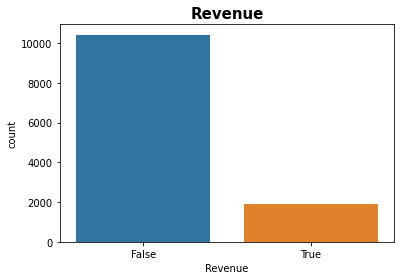

In [6]:
plt.figure()
sns.countplot(data=dataset, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()

In [7]:
operating_system = {1 : "IOS", 2 : "Android Mobile", 3 : "Windows", 4 : "Linux", 
                    5 : "MS-DOS", 6 : "Fedora", 7 : "Ubuntu", 8: "Solaris"}

browser = {1 : "Firefox", 2 : "Google Chrome", 3 : "Microsoft Edge", 4 : "Apple Safari", 
           5 : "Opera", 6 : "Brave", 7 : "UCBrowser", 8: "DuckDuckgo",
           9 : "Chromium", 10 : "Epic", 11 : "Internet Explorer", 12: "Tor Browser",
           13 : "Maxthon"}

region = {1 : "China", 2 : "Indonesia", 3 : "India", 4 : "United States", 
          5 : "Brazil", 6 : "Nigeria", 7 : "Japan", 8: "Russia",
          9 : "Bangladesh"}

dataset.OperatingSystems = dataset.OperatingSystems.map(operating_system)
dataset.Browser = dataset.Browser.map(browser)
dataset.Region = dataset.Region.map(region)

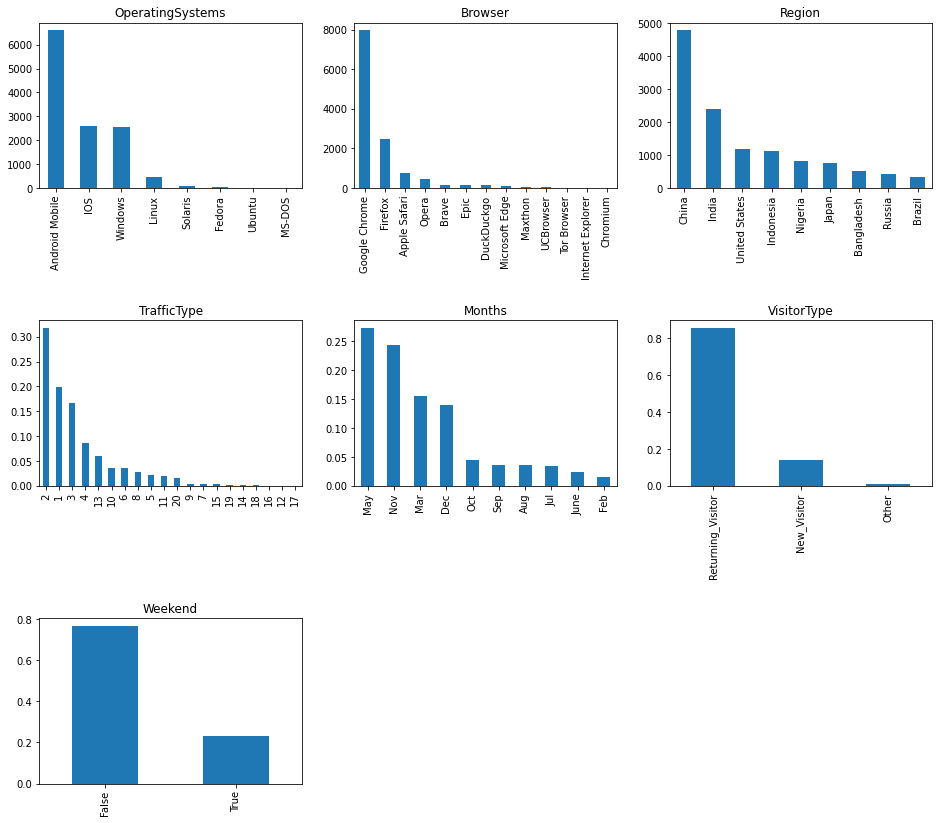

In [8]:
fig = plt.figure(figsize=(16, 14))
fig.subplots_adjust(hspace=0.8)

plt.subplot(331) 
dataset.OperatingSystems.value_counts().plot.bar(title='OperatingSystems')

plt.subplot(332) 
dataset.Browser.value_counts().plot.bar(title='Browser')

plt.subplot(333)
dataset.Region.value_counts().plot.bar(title='Region') 

plt.subplot(334)
dataset['TrafficType'].value_counts(normalize=True).plot.bar(title='TrafficType')

plt.subplot(335) 
dataset['Month'].value_counts(normalize=True).plot.bar(title= 'Months')

plt.subplot(336) 
dataset['VisitorType'].value_counts(normalize=True).plot.bar(title= 'VisitorType')

plt.subplot(337) 
dataset['Weekend'].value_counts(normalize=True).plot.bar(title= 'Weekend')
plt.show()

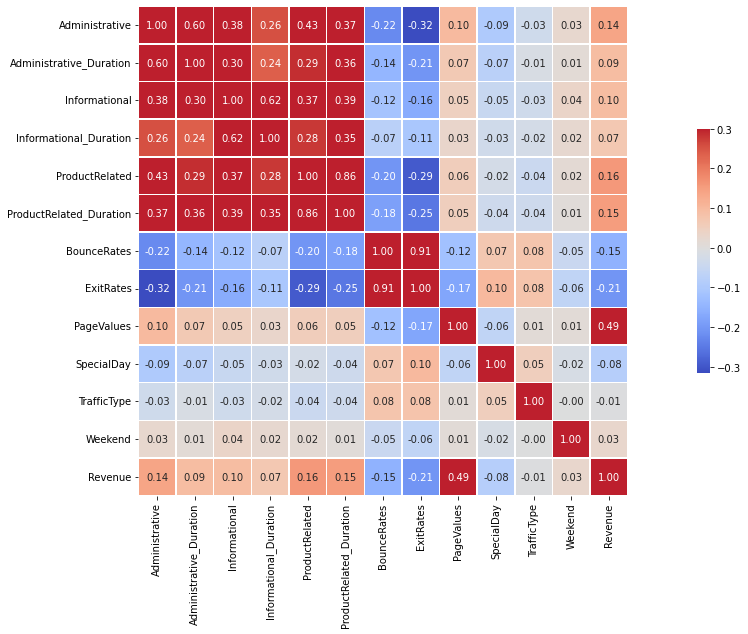

In [9]:
# Correlation Matrix
corr = dataset.corr()
g = sns.heatmap(corr, 
                vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(25,9)
plt.show()

# Train-Test Split & Data Balancing

In [53]:
X = dummy_df.drop('Revenue', axis=1)
y = dummy_df.Revenue

from collections import Counter
print(f"Before balancing, y statistics: {Counter(y)}\n")

# balancing data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_res, y_res = smote.fit_resample(X,y)

print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before balancing, y statistics: Counter({False: 10422, True: 1908})

After OverSampling, the shape of X: (20844, 28)
After OverSampling, the shape of y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [55]:
# 80%-20% train-test split on balanced data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size =0.2)

print(f"Training target statistics: {Counter(y_train_res)}")
print(f"Testing target statistics: {Counter(y_test_res)}")

Training target statistics: Counter({True: 8345, False: 8330})
Testing target statistics: Counter({False: 2092, True: 2077})


## 1. Logistic Regression

In [57]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_res, y_train_res)
y_pred_lg = model.predict(X_test_res)

accuracy_lg = 100 * metrics.accuracy_score(y_test_res, y_pred_lg)
print("Accuracy for Random Forest: %.3f" % (accuracy_lg))
precision_lg = 100 * metrics.precision_score(y_test_res, y_pred_lg)
print("Precision for Random Forest: %.3f" % (precision_lg))
f1score_lg = 100 * metrics.f1_score(y_test_res, y_pred_lg)
print("F1-score for Random Forest: %.3f" % (f1score_lg))

Accuracy for Random Forest: 90.549
Precision for Random Forest: 93.578
F1-score for Random Forest: 90.170


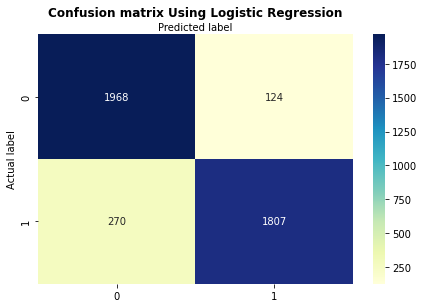

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred_lg)
class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using Logistic Regression', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 1.2 Logistic Regression with k-fold CV

In [60]:
accuracy_lg_kfold = []
precision_lg_kfold = []
f1score_lg_kfold = []

X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
model = LogisticRegression(solver='liblinear')

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]

  model.fit(train_X, train_y)
  y_pred = model.predict(test_X)
  accuracy_lg_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_lg_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_lg_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_lg_kfoldmean = np.mean(accuracy_lg_kfold) * 100
print("Accuracy for Logistic Regression with K-fold CV: %.3f" % (accuracy_lg_kfoldmean))
precision_lg_kfoldmean = np.mean(precision_lg_kfold) * 100
print("Precision for Logistic Regression with K-fold CV: %.3f" % (precision_lg_kfoldmean))
f1score_lg_kfoldmean = np.mean(f1score_lg_kfold) * 100
print("F1-score for Logistic Regression with K-fold CV: %.3f" % (f1score_lg_kfoldmean))


Accuracy for Logistic Regression with K-fold CV: 89.700
Precision for Logistic Regression with K-fold CV: 89.482
F1-score for Logistic Regression with K-fold CV: 89.732


## 2. K-NN
### 2.1 Single K-NN

Text(0, 0.5, 'Error')

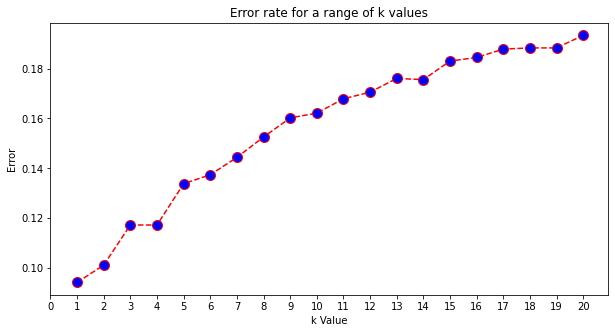

In [23]:

error = []

#Calculating error for K values between 1 and 20
for i in range(1, 21):
    knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=i)
    knn.fit(X_train_res, y_train_res)
    pred_i = knn.predict(X_test_res)
    error.append(np.mean(pred_i != y_test_res))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate for a range of k values')
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('k Value')
plt.ylabel('Error')

In [26]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

# train KNN model
model.fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_res)
kn_train = model.score(X_train_res, y_train_res)
kn_test = model.score(X_test_res, y_test_res)
kn_test

0.9153274166466778

In [27]:
accuracy_knn = 100 * metrics.accuracy_score(y_test_res, y_pred)
print("Accuracy for XGBClassifier: %.3f" % (accuracy_knn))
precision_knn = 100 * metrics.precision_score(y_test_res, y_pred)
print("Precision for XGBClassifier: %.3f" % (precision_knn))
f1score_knn = 100 * metrics.f1_score(y_test_res, y_pred)
print("F1-score for XGBClassifier: %.3f" % (f1score_knn))

Accuracy for XGBClassifier: 91.533
Precision for XGBClassifier: 87.489
F1-score for XGBClassifier: 92.119


Text(0.5, 257.44, 'Predicted label')

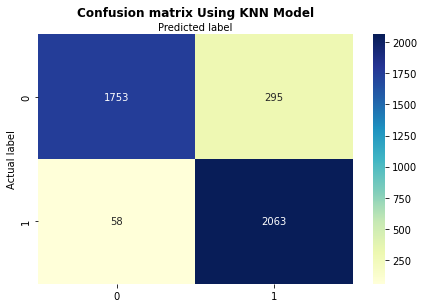

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using KNN Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2.2 KNN with k-fold CV

Text(0, 0.5, 'Error')

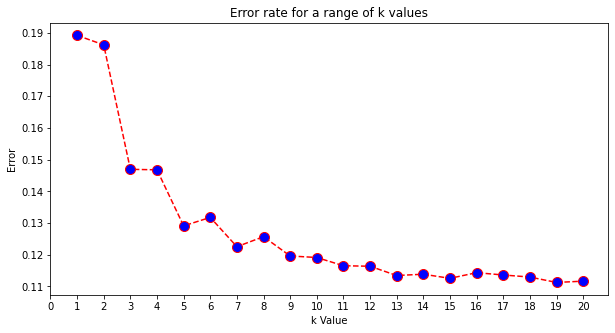

In [30]:
# Balancing dataset
X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

error = []

#Calculating error for K values between 1 and 20
for i in range(1, 21):
  e = []
  for train_ix, test_ix in kfold.split(X, y):
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]

    knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=i)
    knn.fit(train_X, train_y)
    pred_i = knn.predict(test_X)
    e.append(np.mean(pred_i != test_y))

  error.append(sum(e) / len(e))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate for a range of k values')
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('k Value')
plt.ylabel('Error')

In [29]:
accuracy_knn_kfold = []
precision_knn_kfold = []
f1score_knn_kfold = []

min_neighbours = error.index(min(error), 0, len(error)) + 1

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]

  knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=min_neighbours)
  knn.fit(train_X, train_y)
  y_pred = knn.predict(test_X)
  accuracy_knn_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_knn_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_knn_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_knn_kfoldmean = np.mean(accuracy_knn_kfold) * 100
print("Accuracy for K-NN with K-fold CV: %.3f" % (accuracy_knn_kfoldmean))
precision_knn_kfoldmean = np.mean(precision_knn_kfold) * 100
print("Precision for K-NN with K-fold CV: %.3f" % (precision_knn_kfoldmean))
f1score_knn_kfoldmean = np.mean(f1score_knn_kfold) * 100
print("F1-score for K-NN with K-fold CV: %.3f" % (f1score_knn_kfoldmean))

Accuracy for K-NN with K-fold CV: 81.079
Precision for K-NN with K-fold CV: 80.665
F1-score for K-NN with K-fold CV: 81.208


## 3. SVC
### 3.1 Single SVC

In [44]:
# SVC
svc = SVC()
svc.fit(X_train_res, y_train_res)
y_pred = svc.predict(X_test_res)
sv_train = svc.score(X_train_res, y_train_res)
sv_test = svc.score(X_test_res, y_test_res)
sv_test

0.7260733988966179

In [45]:
accuracy_svc = 100 * metrics.accuracy_score(y_test_res, y_pred)
print("Accuracy for SVC: %.3f" % (accuracy_svc))
precision_svc = 100 * metrics.precision_score(y_test_res, y_pred)
print("Precision for SVC: %.3f" % (precision_svc))
f1score_svc = 100 * metrics.f1_score(y_test_res, y_pred)
print("F1-score for SVC: %.3f" % (f1score_svc))

Accuracy for SVC: 72.607
Precision for SVC: 74.269
F1-score for SVC: 72.402


Text(0.5, 257.44, 'Predicted label')

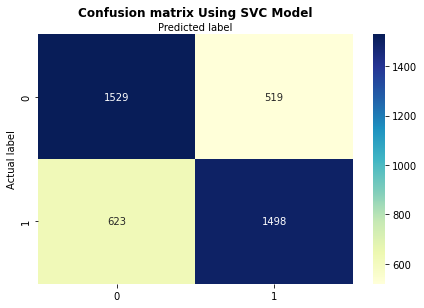

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using SVC Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.2 SVC with K-fold CV

In [47]:
accuracy_svc_kfold = []
precision_svc_kfold = []
f1score_svc_kfold = []

X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]
  svc = SVC()
  svc.fit(train_X, train_y)
  y_pred = svc.predict(test_X)

  accuracy_svc_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_svc_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_svc_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_svc_kfoldmean = np.mean(accuracy_svc_kfold) * 100
print("Accuracy for SVC with K-fold CV: %.3f" % (accuracy_svc_kfoldmean))
precision_svc_kfoldmean = np.mean(precision_svc_kfold) * 100
print("Precision for SVC with K-fold CV: %.3f" % (precision_svc_kfoldmean))
f1score_svc_kfoldmean = np.mean(f1score_svc_kfold) * 100
print("F1-score for SVC with K-fold CV: %.3f" % (f1score_svc_kfoldmean))

Accuracy for SVC with K-fold CV: 90.073
Precision for SVC with K-fold CV: 90.576
F1-score for SVC with K-fold CV: 90.011


## 4. Decision Tree

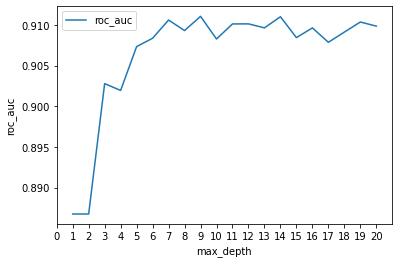

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

max_depth = []
roc_auc = []
for i in range(1,21,1):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train_res, y_train_res)
    pred = dtree.predict(X_test_res)
    roc_auc.append(metrics.roc_auc_score(y_test_res, pred))
    max_depth.append(i)

d = pd.DataFrame({'roc_auc':pd.Series(roc_auc), 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','roc_auc', data=d)
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('max_depth')
plt.ylabel('roc_auc')
plt.legend()

In [36]:
depth = max_depth[roc_auc.index(max(roc_auc))]

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtc.fit(X_train_res, y_train_res)
y_pred = dtc.predict(X_test_res)

accuracy_dtc = 100 * metrics.accuracy_score(y_test_res, y_pred)
print("Accuracy for Decision Tree: %.3f" % (accuracy_dtc))
precision_dtc = 100 * metrics.precision_score(y_test_res, y_pred)
print("Precision for Decision Tree: %.3f" % (precision_dtc))
f1score_dtc = 100 * metrics.f1_score(y_test_res, y_pred)
print("F1-score for Decision Tree: %.3f" % (f1score_dtc))


Accuracy for Decision Tree: 90.717
Precision for Decision Tree: 91.844
F1-score for Decision Tree: 90.770


Text(0.5, 257.44, 'Predicted label')

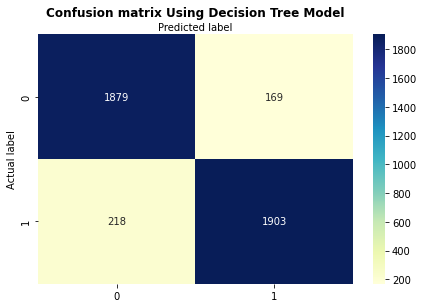

In [37]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using Decision Tree Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

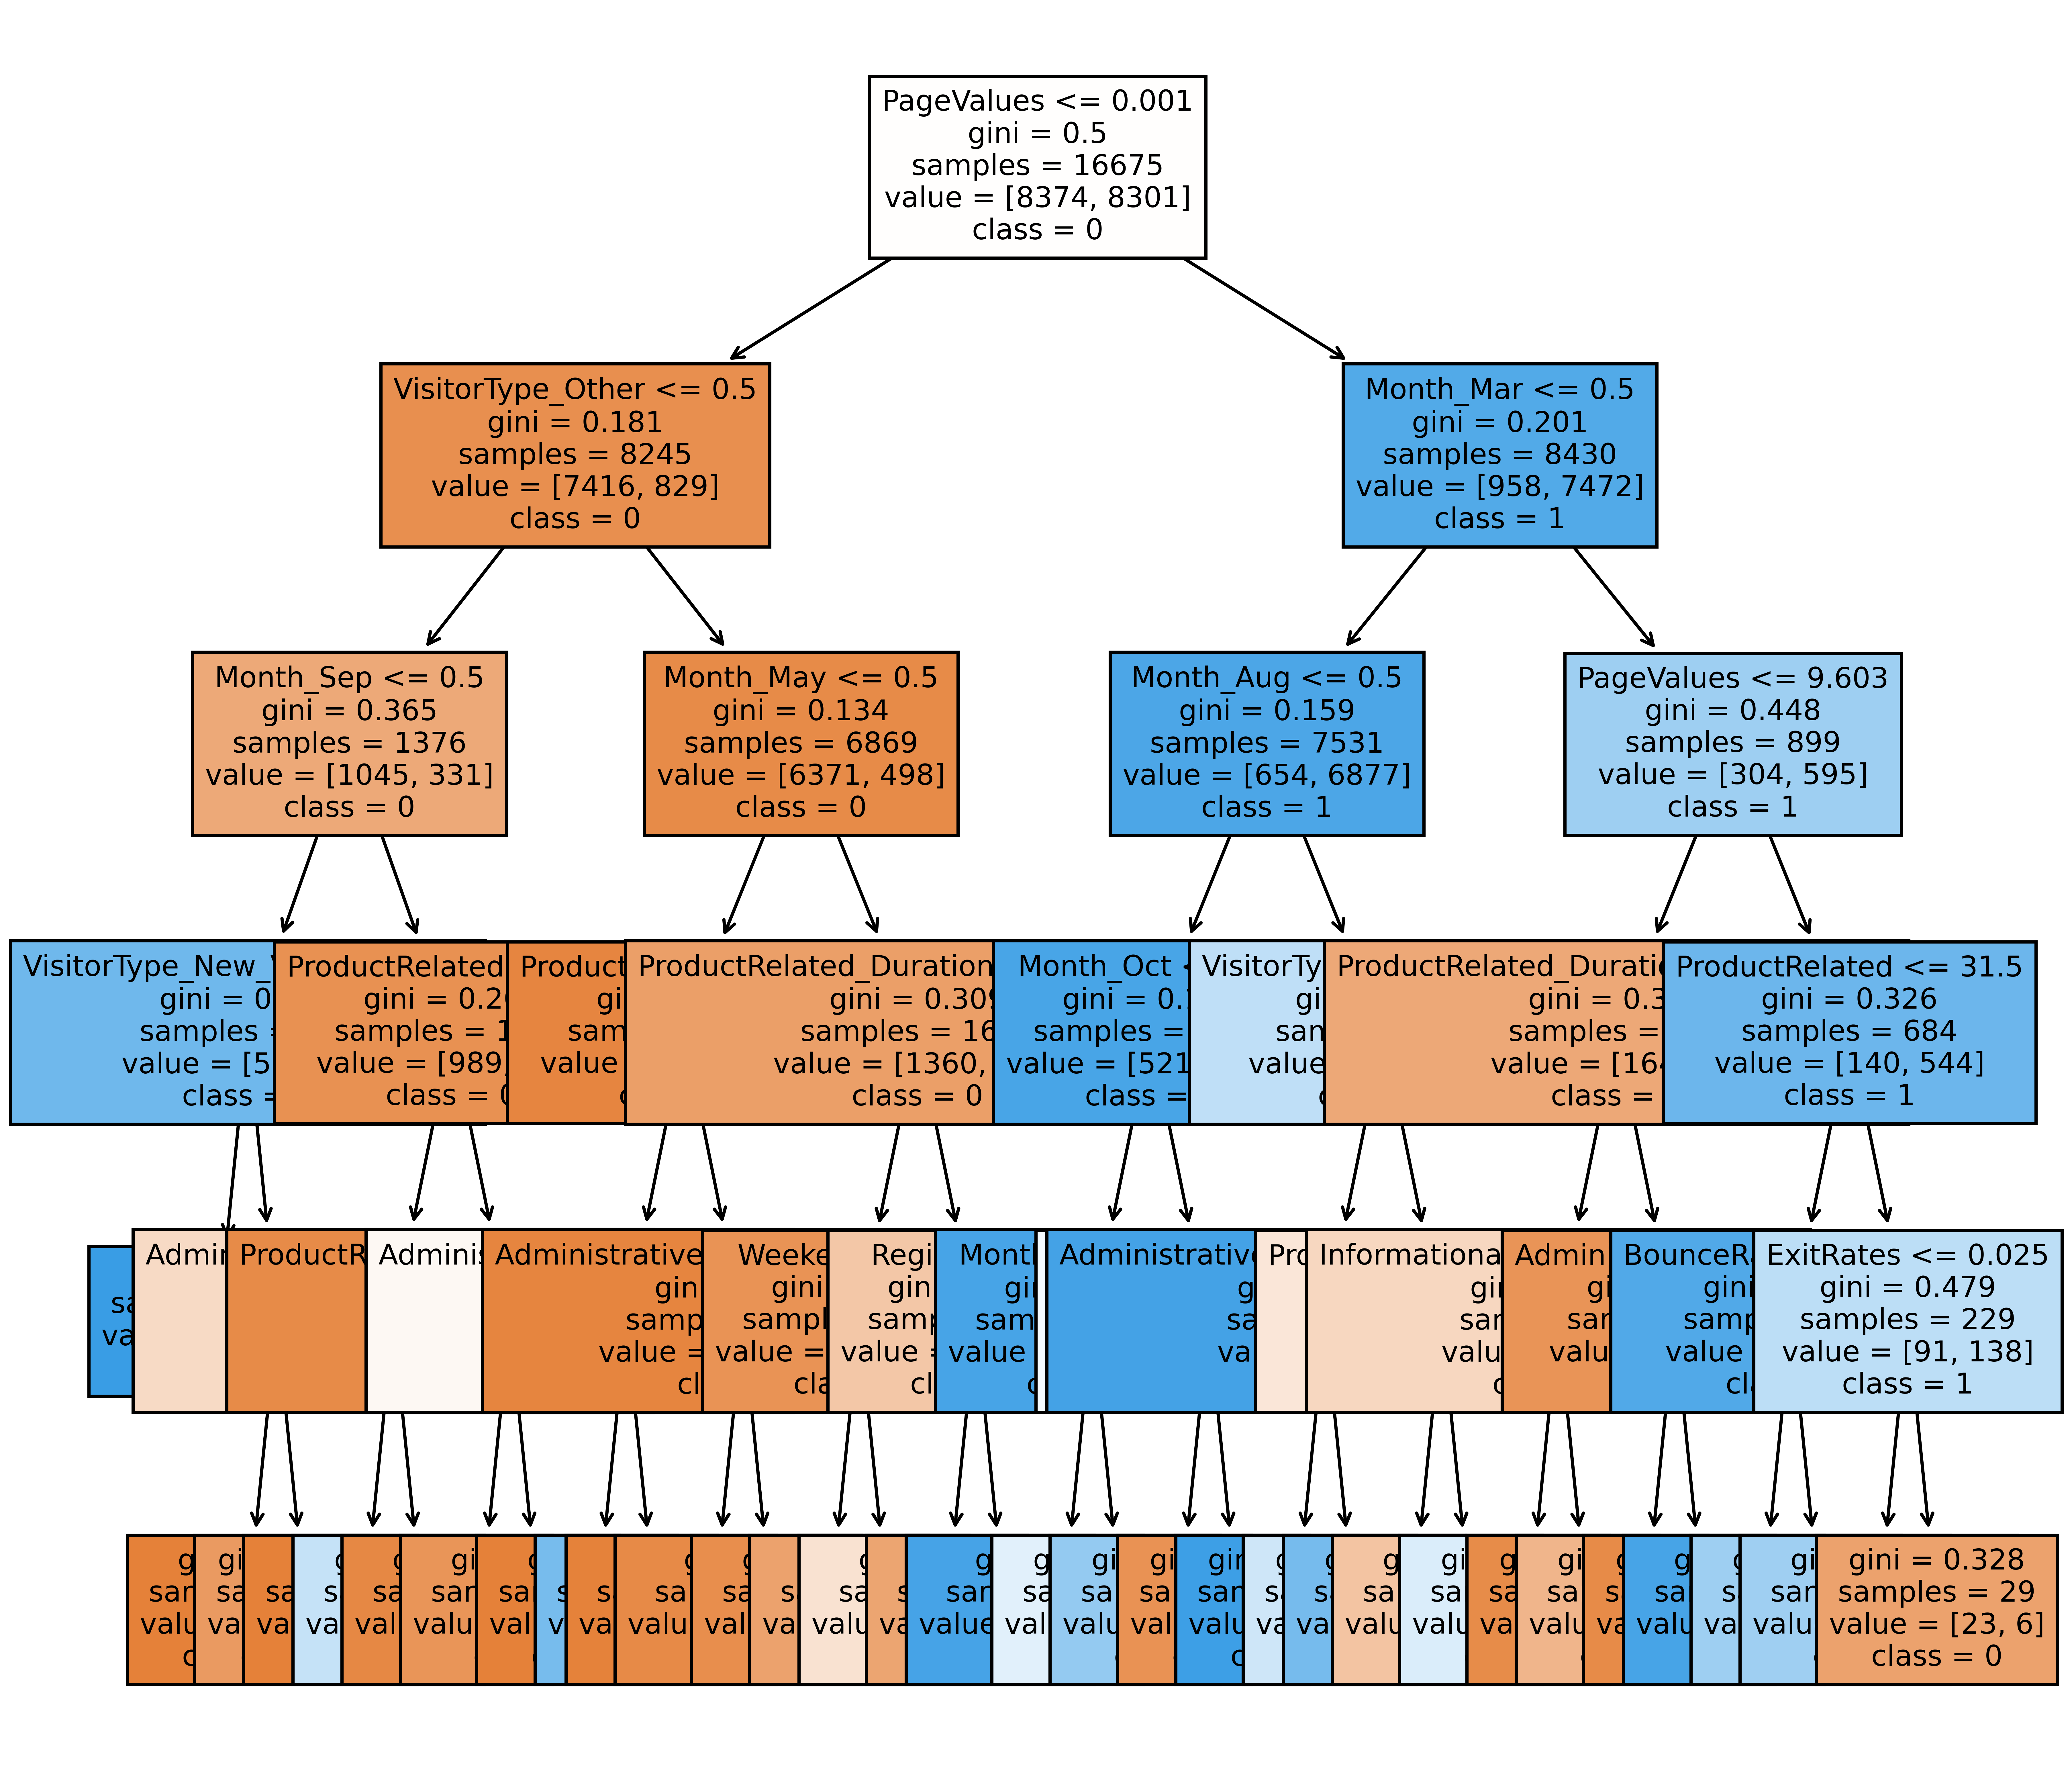

In [48]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,dpi=800, figsize=(10, 10))
tree.plot_tree(dtc, 
               feature_names=dummy_df.columns[:-1], 
               class_names=['0', '1'], 
               filled=True,
               fontsize=9)
plt.show()

## 5. Random Forest with K-fold CV
### 5.1 Tuning Hyper-parameters

In [ ]:
param_rf = {
    'bootstrap': [True],
    'max_depth': [20, 40, 80],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 50, 100, 150]
}

rf = RandomForestClassifier()
skf_rf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 0)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_rf, 
                              cv = skf_rf.split(X_train_res, y_train_res), 
                              n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train_res, y_train_res)

print(grid_search_rf.best_params_)

### 5.2 Fitting RF Model with Tuned Hyper-parameters

In [39]:
# y_pred_rf_kfold = grid_search_rf.best_estimator_.predict(X_test_res)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2,min_samples_leaf=1,max_features=2,max_depth=40,bootstrap=True)
rf.fit(X_train_res, y_train_res)
y_pred_rf_kfold = rf.predict(X_test_res)

accuracy_rf_kfold = 100 * metrics.accuracy_score(y_test_res, y_pred_rf_kfold)
print("Accuracy for Random Forest: %.3f" % (accuracy_rf_kfold))
precision_rf_kfold = 100 * metrics.precision_score(y_test_res, y_pred_rf_kfold)
print("Precision for Random Forest: %.3f" % (precision_rf_kfold))
f1score_rf_kfold = 100 * metrics.f1_score(y_test_res, y_pred_rf_kfold)
print("F1-score for Random Forest: %.3f" % (f1score_rf_kfold))


Accuracy for Random Forest: 93.428
Precision for Random Forest: 94.335
F1-score for Random Forest: 93.482


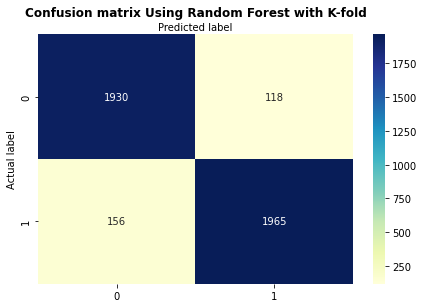

In [40]:
cnf_matrix_rf = metrics.confusion_matrix(y_test_res, y_pred_rf_kfold)
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using Random Forest with K-fold', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## 6. Gradient Boosting Decision Tree
### 6.1 Tuning Hyper-parameters

In [ ]:

from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


params = {
        'min_child_weight': [1, 5, 10],
        # 'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 8, 12],
        'n_estimators': [500, 1000, 1500, 2000],
        'learning_rate': [0.02, 0.1, 0.2]
        }
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 0)

search = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', 
                      cv=skf.split(X_train_res, y_train_res), verbose=3, refit=True)

start_time = timer(None)
search.fit(X_train_res, y_train_res)
timer(start_time)
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.6;, score=0.925 total time=   3.8s
[CV 2/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.6;, score=0.938 total time=   3.8s
[CV 3/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.6;, score=0.931 total time=   3.8s
[CV 1/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.926 total time=   3.5s
[CV 2/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.938 total time=   3.4s
[CV 3/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.931 total time=   3.4s
[CV 1/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0;, score=0.926 total time=   2.9s
[CV 2/3] END learnin

### 6.2 Single XGBClassification with Tunned Hyper-parameters

In [33]:

xgb = XGBClassifier(n_estimators=500, random_state=0, max_depth=3, learning_rate=0.02, min_child_weight=1, subsample=0.8)
xgb.fit(X_train_res, y_train_res)
y_pred_res = xgb.predict(X_test_res)
xgb_train = xgb.score(X_train_res, y_train_res)
xgb_test = xgb.score(X_test_res, y_test_res)

accuracy_xgbc = 100 * metrics.accuracy_score(y_test_res, y_pred_res)
print("Accuracy for XGBClassifier: %.3f" % (accuracy_xgbc))
precision_xgbc = 100 * metrics.precision_score(y_test_res, y_pred_res)
print("Precision for XGBClassifier: %.3f" % (precision_xgbc))
f1score_xgbc = 100 * metrics.f1_score(y_test_res, y_pred_res)
print("F1-score for XGBClassifier: %.3f" % (f1score_xgbc))


Accuracy for XGBClassifier: 91.125
Precision for XGBClassifier: 92.112
F1-score for XGBClassifier: 91.190


Text(0.5, 257.44, 'Predicted label')

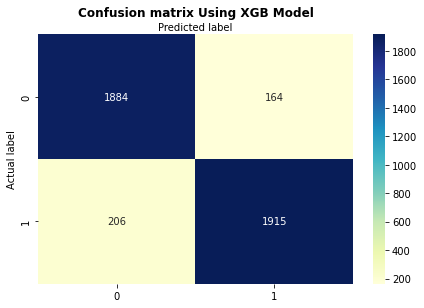

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred_res)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using XGB Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 6.3 XGBClassification with K-Fold CV

In [32]:
accuracy_xgb_kfold = []
precision_xgb_kfold = []
f1score_xgb_kfold = []

X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]
  xgb = XGBClassifier(n_estimators=500, random_state=0, max_depth=3, learning_rate=0.02, min_child_weight=1, subsample=0.8)
  xgb.fit(train_X, train_y)
  y_pred = xgb.predict(test_X)
  accuracy_xgb_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_xgb_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_xgb_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_xgb_kfoldmean = np.mean(accuracy_xgb_kfold) * 100
print("Accuracy for XGBClassifier with K-fold CV: %.3f" % (accuracy_xgb_kfoldmean))
precision_xgb_kfoldmean = np.mean(precision_xgb_kfold) * 100
print("Precision for XGBClassifier with K-fold CV: %.3f" % (precision_xgb_kfoldmean))
f1score_xgb_kfoldmean = np.mean(f1score_xgb_kfold) * 100
print("F1-score for XGBClassifier with K-fold CV: %.3f" % (f1score_xgb_kfoldmean))

Accuracy for XGBClassifier with K-fold CV: 91.103
Precision for XGBClassifier with K-fold CV: 90.093
F1-score for XGBClassifier with K-fold CV: 91.216


# Model Comparison

In [49]:
data = {'Algorithms':['Logistic Regression', 'Logistic Regression + k-fold', 'K-NN', 'K-NN + k-fold', 'SVC', 'SVC + k-fold', 'Decision Tree', 'Random Forest + k-fold', 'XGBClassifier', 'XGBClassifier + k-fold'], 
        'Accuracy':[accuracy_lg, accuracy_lg_kfoldmean, accuracy_knn, accuracy_knn_kfoldmean, accuracy_svc, accuracy_svc_kfoldmean, accuracy_dtc, accuracy_rf_kfold, accuracy_xgbc, accuracy_xgb_kfoldmean],
        'Precision':[precision_lg, precision_lg_kfoldmean, precision_knn, precision_knn_kfoldmean, precision_svc, precision_svc_kfoldmean, precision_dtc, precision_rf_kfold, precision_xgbc, precision_xgb_kfoldmean],
        'F1 Score':[f1score_lg, f1score_lg_kfoldmean, f1score_knn, f1score_knn_kfoldmean, f1score_svc, f1score_svc_kfoldmean, f1score_dtc, f1score_rf_kfold, f1score_xgbc, f1score_xgb_kfoldmean]}
 
# Calling DataFrame constructor
models = pd.DataFrame(data)
 
models

,Algorithms,Accuracy,Precision,F1 Score
0,Logistic Regression,89.949628,94.415449,89.621006
1,Logistic Regression + k-fold,89.042985,89.835766,88.936003
2,K-NN,91.532742,87.489398,92.118777
3,K-NN + k-fold,81.078670,80.664553,81.208146
4,SVC,72.607340,74.268716,72.402127
5,SVC + k-fold,90.072993,90.575714,90.010689
6,Decision Tree,90.717198,91.843629,90.770332
7,Random Forest + k-fold,93.427680,94.335094,93.482398
8,XGBClassifier,91.124970,92.111592,91.190476
9,XGBClassifier + k-fold,91.103001,90.092995,91.215533
